# RNN

Reference : https://sharmasaravanan.medium.com/recurrent-neural-networks-rnn-using-tensorflow-simple-rnns-stacked-rnns-and-bidirectional-rnns-1ffba776d9e1

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('tweet_emotions.csv')  

In [13]:
df.head(10)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


Epoch 1/10


d:\SEM_2_SETU\ml\ML_Algorithms_shon\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


875/875 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.2433 - loss: 2.1384 - val_accuracy: 0.3178 - val_loss: 1.9736
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.3752 - loss: 1.8405 - val_accuracy: 0.3126 - val_loss: 1.9973
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.4981 - loss: 1.5207 - val_accuracy: 0.2989 - val_loss: 2.1427
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.6251 - loss: 1.1935 - val_accuracy: 0.2855 - val_loss: 2.4304
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.7151 - loss: 0.9153 - val_accuracy: 0.2616 - val_loss: 2.7491
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.7921 - loss: 0.7000 - val_accuracy: 0.2620 - val_loss: 3.0411
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.8324 - loss: 0.5679 - val_accuracy: 0.2453 - val_loss: 3.4194
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.8676 - loss: 0.4519 - val_accurac

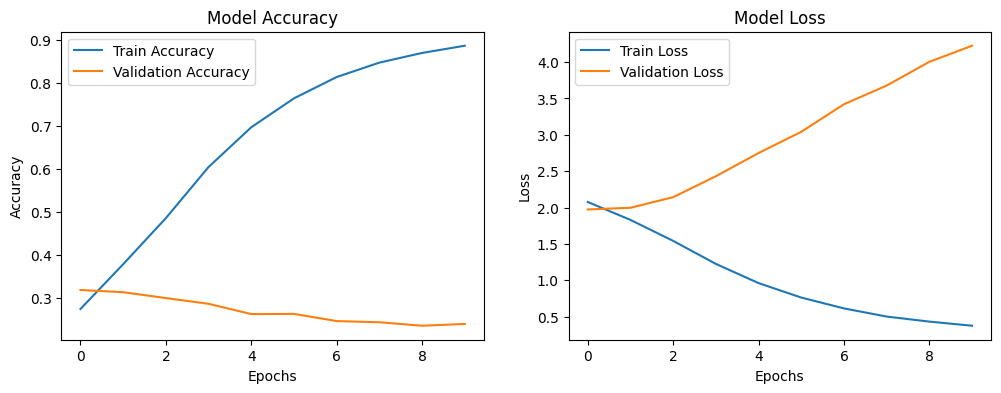

In [20]:

# Preprocessing
texts = df['content'].values  # Text column contains input text
labels = df['sentiment'].values  # Emotion column contains labels

# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)  # Convert labels to numerical format

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

# Padding
max_length = 100  # Adjust as necessary
X = pad_sequences(sequences, maxlen=max_length)

# Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Building RNN model
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=64, input_length=max_length),
    SimpleRNN(64, return_sequences=False),
    Dense(len(label_encoder.classes_), activation='softmax')  # Multi-class classification
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

